<H2>
<B>TOPIC    :</B> MODEL BUILDING AND EVALUATION <BR>
<B><CENTER>MARKETING ANALYTICS</CENTER></B></H2>

##<b>Importing the packages</b>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from  scipy import stats
plt.rc('figure',figsize=(20,10))

#Splitting the data
from sklearn.model_selection import train_test_split

#Package for evaluating the model
from sklearn.metrics import classification_report,confusion_matrix

#KNeighborsClassifier model
from sklearn.neighbors import KNeighborsClassifier

#DecisionTreeClassifier model
from sklearn.tree import DecisionTreeClassifier

#RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

##<b>Load the data set</b>

In [ ]:
data= pd.read_csv('/content/pseudo_facebook.csv')
data

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11.0,male,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1192601,14,2,1999,11.0,female,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2083884,14,16,1999,11.0,male,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1203168,14,25,1999,12.0,female,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1733186,14,4,1999,12.0,male,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21811,1784698,50,16,1963,9.0,female,508.0,27.0,19.0,3.0,0.0,3.0,0.0,0.0,0.0
21812,1980139,61,21,1952,2.0,male,1735.0,27.0,10.0,3.0,0.0,3.0,0.0,0.0,0.0
21813,1728067,67,10,1946,8.0,male,487.0,26.0,19.0,3.0,0.0,3.0,0.0,0.0,0.0
21814,1406471,14,2,1999,1.0,male,165.0,26.0,17.0,3.0,1.0,3.0,1.0,0.0,0.0


In [ ]:
data.shape

(99003, 15)

##<b>Handling the missing values</b>

In [ ]:
data.isnull().sum()

userid                    0
age                       0
dob_day                   0
dob_year                  0
dob_month                 1
gender                   29
tenure                    1
friend_count              1
friendships_initiated     1
likes                     1
likes_received            1
mobile_likes              1
mobile_likes_received     1
www_likes                 1
www_likes_received        1
dtype: int64

We have the 175 null values in the gender column and 2 null values in the tenure column. We have 99003 records with 15 attributes. So, by droping the 177 null values will not effect the pattern. So, I am dropping the null values in the present data set. 

In [ ]:
data=data.dropna()
data.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

After dropping the values there are no null values. 

In [ ]:
data.shape

(21787, 15)

##<b>Checking the categorical values in the data</b>

In [ ]:
categorical=[col for col in data.columns if data[col].dtype=='object']
for i,j in enumerate(categorical):
    print("{0}: {1} has the unique elements:{2}".format(i+1,j,data[j].unique()))

1: gender has the unique elements:['male' 'female']


So, we have only one categorical column value, in the given data set.

##<b>Adding a column  that will classify people in different age groups<b>

In [ ]:
labels=['13-19','20-34','35-49','50-65','over 65']
data['age_group']=pd.cut(data.age,bins=[12,19,34,49,65,data.age.max()],labels=labels,include_lowest=True)
data.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,2094382,14,19,1999,11.0,male,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13-19
1,1192601,14,2,1999,11.0,female,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13-19
2,2083884,14,16,1999,11.0,male,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13-19
3,1203168,14,25,1999,12.0,female,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13-19
4,1733186,14,4,1999,12.0,male,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13-19


##<b>AGE GROUP CLASSIFICATION</b>

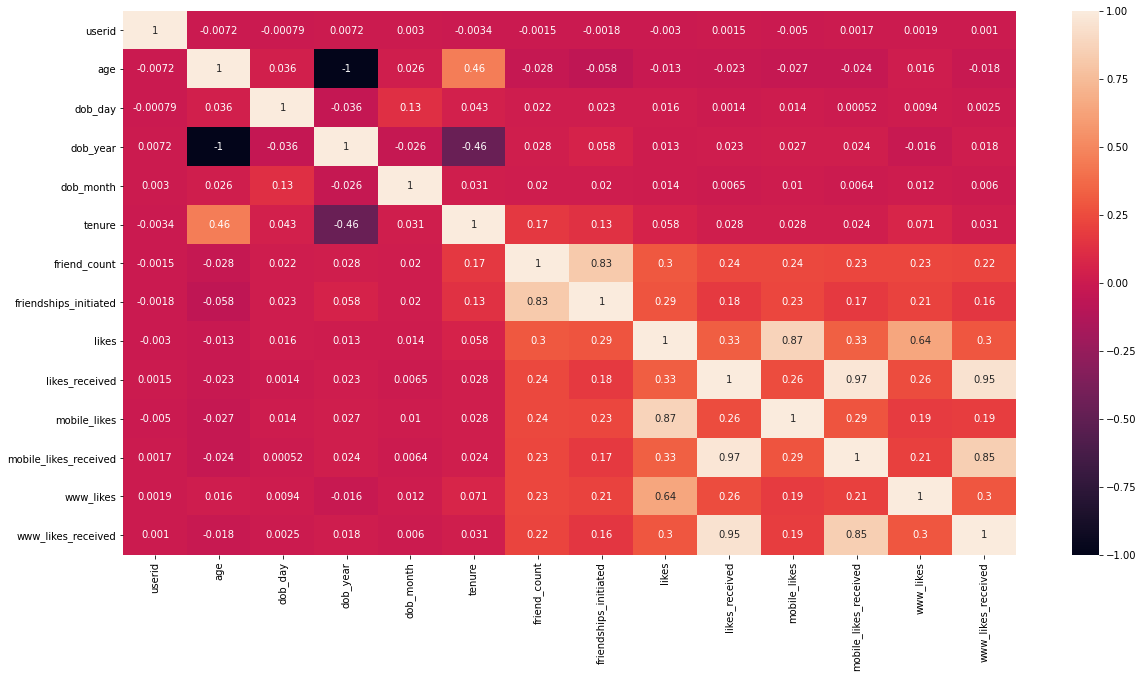

In [ ]:
sns.heatmap(data.corr('pearson'),annot=True)

<h3><i>
The age is positively related to all kinds of likes. Moreover, we donnot require the userid for predicting the age group bin so we drop the userid column. And for predicting the age group I am even dropping the age attribute. 
</h3></i>


**AGE** **DISTRIBUTION**

Text(0.5, 1.0, 'Age Distribution of Facebook Users')

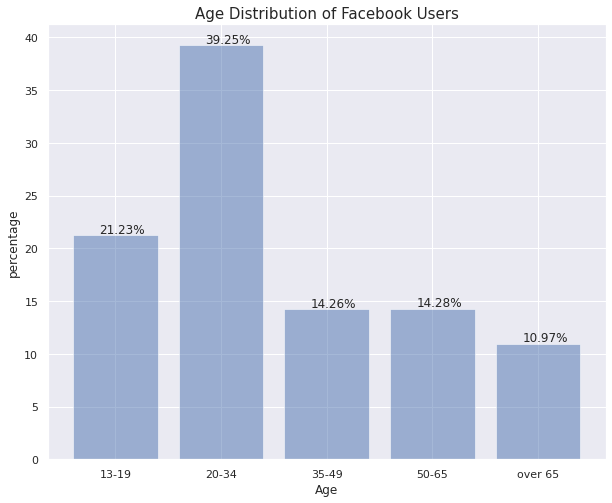

In [ ]:
sns.set()
fig,ax=plt.subplots(figsize=(10,8))
test=data.groupby("age_group")["tenure"].count()
test=test/sum(test)*100
ax.bar(test.index,test.values,alpha=0.5)
for i in ax.patches:
    ax.text(i.get_x()+0.25,i.get_height()+0.2,str(round(i.get_height(),2))+'%')
ax.set_xlabel("Age")
ax.set_ylabel("percentage")
ax.set_title("Age Distribution of Facebook Users",fontsize=15)

The people between the age group 20-30 are more likely to use facebook. The people between the age groups 13-19 are next addicted users of facebook. The people with age 3-65 use facebook at same pace. Very less ratio of people at with age >65 use facebook. 

###<b>Filtering the data by removing the unnecessary columns</b>

In [ ]:
a_data=data.iloc[:, 3:]
a_data.head()

,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,age_group
0,1999,11.0,male,266.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13-19
1,1999,11.0,female,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13-19
2,1999,11.0,male,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13-19
3,1999,12.0,female,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13-19
4,1999,12.0,male,82.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13-19


##<h3><b>Splitting the Data to train and test<h3></b>

In [ ]:
x = a_data.drop(['age_group','gender'], axis=1)
y = a_data['age_group']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

##<B><H2>DECISION TREE:</B><BR>

The decision tree is an non parametric and supervised machine learning algorithm. It is used for both classification and regression problems. There is possibility of overfitting

In [ ]:
#Fitting the model
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

#Confusion Matrix
print(confusion_matrix(y_test,y_pred_dt)) 

#Classification Report
print(classification_report(y_test,y_pred_dt))

[[ 6287     0     0     0     0]
 [    0 11602     0     0     0]
 [    0     0  4208     0     0]
 [    0     0     0  4285     0]
 [    0     0     0     0  3266]]
              precision    recall  f1-score   support

       13-19       1.00      1.00      1.00      6287
       20-34       1.00      1.00      1.00     11602
       35-49       1.00      1.00      1.00      4208
       50-65       1.00      1.00      1.00      4285
     over 65       1.00      1.00      1.00      3266

    accuracy                           1.00     29648
   macro avg       1.00      1.00      1.00     29648
weighted avg       1.00      1.00      1.00     29648



##<B><H2>RANDOM FOREST:</B><BR>

The random forest is ensemble learning method which is a  supervised machine learning learning algorithm that can be used to solve both classification and regression problems. Reduce the risk of overfitting

In [ ]:
#Fitting the model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

#Confusion Matrix
print(confusion_matrix(y_test,y_pred_rf)) 

#Classification Report
print(classification_report(y_test,y_pred_rf))
from sklearn.metrics import accuracy_score
print('Accuracy' + str(accuracy_score(y_test, y_pred_rf)))

[[ 881    0    0    0    0]
 [   0 2798    0    0    0]
 [   0    0 1304    0    0]
 [   0    0    0 1081    0]
 [   0    0    0    0  473]]
              precision    recall  f1-score   support

       13-19       1.00      1.00      1.00       881
       20-34       1.00      1.00      1.00      2798
       35-49       1.00      1.00      1.00      1304
       50-65       1.00      1.00      1.00      1081
     over 65       1.00      1.00      1.00       473

    accuracy                           1.00      6537
   macro avg       1.00      1.00      1.00      6537
weighted avg       1.00      1.00      1.00      6537

Accuracy1.0


##<B><H2>KNN ALGORITHM:</B><BR>

The K-Nearest neighbors algorithm is a simple, supervised machine learning learning algorithm that can be used to solve both classification and regression problems. 

In [ ]:
#Fitting the model
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

#Confusion Matrix
print(confusion_matrix(y_test,y_pred_knn)) 

#Classification Report
print(classification_report(y_test,y_pred_knn))

[[3535 2599   79   41   33]
 [2089 8812  426  206   69]
 [ 263 1439 1958  501   47]
 [ 144  518  695 2590  338]
 [ 149  234  133  828 1922]]
              precision    recall  f1-score   support

       13-19       0.57      0.56      0.57      6287
       20-34       0.65      0.76      0.70     11602
       35-49       0.59      0.47      0.52      4208
       50-65       0.62      0.60      0.61      4285
     over 65       0.80      0.59      0.68      3266

    accuracy                           0.63     29648
   macro avg       0.65      0.60      0.62     29648
weighted avg       0.64      0.63      0.63     29648



##<h3><b>INERENCE:</B><BR>
In the given data, I am dropping the columns userid, age, dob, gender because their impact on classifying the individuals into different age groups is less. 

When I have dropped the dod_year column and built the model, then, KNN was the best classifier than the decision tree and the random forest. But when I have included the dob_year column then the Random forest and the decision tree stood as the best classifier than the KNN algorithm. 